In [1]:
import napari
import pyclesperanto_prototype as cle
import pandas as pd
from skimage.io import imread
from dask_image.imread import imread

location = "C:/Users/ryans/Documents/output data (big)/Lund Gastrulation Correct voxel sizes/"
filename_glob = "rescaled t =*s.tif"

dask_stack = imread(location+filename_glob)

In [3]:
dask_stack

dask.array<_map_read_frame, shape=(25, 302, 1024, 512), dtype=float32, chunksize=(1, 302, 1024, 512), chunktype=numpy.ndarray>

The dask_image library works super simply for theusecase with multiple files in one folder so we can maybe make a function around this that allows the easy loading for files from folders with this: 

In [32]:
from magicgui import magicgui
from napari.types import ImageData, LabelsData
import pathlib
from dask_image.imread import imread


@magicgui(folder_location={'mode': 'd', 'label' : 'Folder Location:'},
          filename={'label': 'File Name:'}, 
          labels={'label': 'Label Image'},
          call_button='Open')
def load_dask_array_from_folder(filename: str = 'your_file_name_t*.tif', 
                                folder_location = pathlib.Path.home(), 
                                labels: bool = False) -> ImageData:
    dask_stack = imread(folder_location + filename)
    print('here')   
    return dask_stack

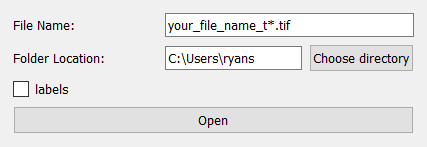

In [33]:
load_dask_array_from_folder

In [34]:
viewer = napari.Viewer()

C:\Users\ryans\Anaconda3\envs\ncp-dev\lib\site-packages\napari_tools_menu\__init__.py:165: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


In [35]:
viewer.window.add_dock_widget(load_dask_array_from_folder)